In [28]:
import numpy as np
from fipy import CellVariable, Grid2D, DiffusionTerm
from fipy.tools import numerix
import matplotlib.pyplot as plt
import pickle 


epsilon = 0.01

L = 1
nx = 1024
dx = L/nx
mesh = Grid2D(dx=dx, dy=dx, nx=nx, ny=nx)

boundary_value = 0.

var = CellVariable(mesh=mesh, name="variable")

var.constrain(boundary_value, mesh.facesLeft)
var.constrain(boundary_value, mesh.facesRight)
var.constrain(boundary_value, mesh.facesTop)
var.constrain(boundary_value, mesh.facesBottom)

k = .9*numerix.sin(2*np.pi*mesh.x/epsilon)*numerix.cos(2*np.pi*mesh.y/epsilon) + 1

k_non = 1 + k*var**2

eq = (DiffusionTerm(coeff=k_non) + 50==0)

eq.solve(var=var)


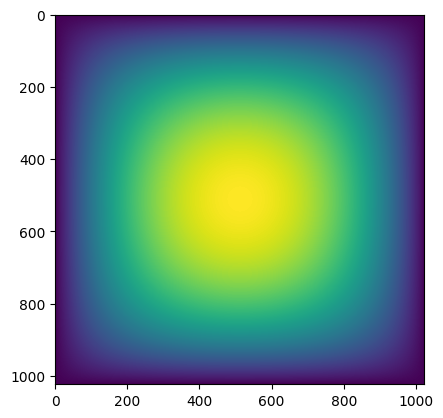

In [29]:
gt = np.array(var).reshape(nx,nx)
plt.imshow(gt)

In [30]:
with open('elliptic_2D_eps_1_100_nonlinear.pkl', 'wb') as file: 
    pickle.dump(gt, file) 

In [31]:
with open('elliptic_2D_eps_1_100_nonlinear.pkl', 'rb') as file: 
    myvar = pickle.load(file) 
  
    print(myvar) 

[[6.01893125e-05 1.56726080e-04 2.42450065e-04 ... 2.42450065e-04
  1.56726080e-04 6.01893125e-05]
 [1.56726080e-04 4.33307304e-04 6.86046670e-04 ... 6.86046670e-04
  4.33307304e-04 1.56726080e-04]
 [2.42450065e-04 6.86046670e-04 1.09859290e-03 ... 1.09859290e-03
  6.86046670e-04 2.42450065e-04]
 ...
 [2.42450065e-04 6.86046670e-04 1.09859290e-03 ... 1.09859290e-03
  6.86046670e-04 2.42450065e-04]
 [1.56726080e-04 4.33307304e-04 6.86046670e-04 ... 6.86046670e-04
  4.33307304e-04 1.56726080e-04]
 [6.01893125e-05 1.56726080e-04 2.42450065e-04 ... 2.42450065e-04
  1.56726080e-04 6.01893125e-05]]


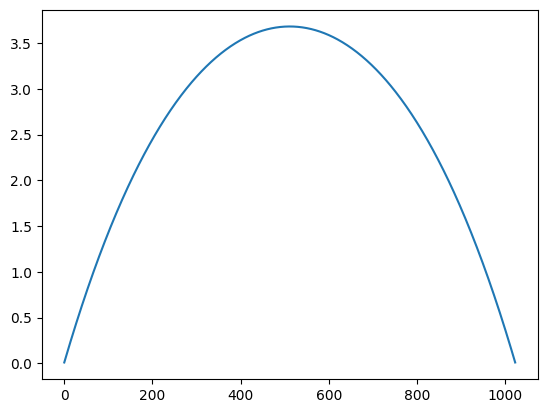

In [32]:
plt.plot(gt[500,:])